<a href="https://colab.research.google.com/github/gianerr/CSST-101/blob/main/3B_PLATA_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Setting Up the Environment

In [ ]:
pip install pgmpy numpy pandas matplotlib

# Exercise 2: Building a Simple DBN

In [ ]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()
model.add_edges_from([(('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1))])

model.add_cpds(
    TabularCPD(('Rain', 0), 2, [[0.8], [0.2]]),
    TabularCPD(('Sprinkler', 0), 2, [[0.6,0.2], [0.4, 0.8]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('Rain', 1), 2, [[0.7, 0.3], [0.3, 0.7]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('Sprinkler', 1), 2, [[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 1)], evidence_card=[2])
)

# Exercise 3: Performing Inference

In [ ]:
from pgmpy.inference import DBNInference

dbn_infer = DBNInference(model)
result = dbn_infer.query(variables=[('Rain', 1)], evidence={('Rain', 0): 1})
print(result)

{('Rain', 1): <DiscreteFactor representing phi(('Rain', 1):2) at 0x7afdacd9b640>}


# Exercise 4: Visualizing the DBN

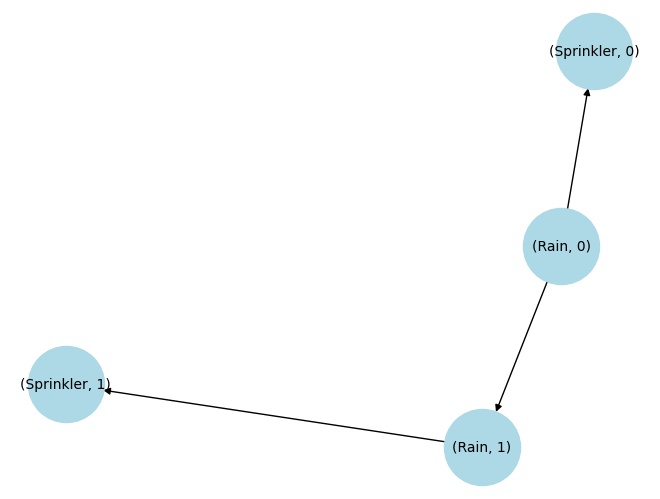

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()
for edge in model.edges():
    graph.add_edge(edge[0], edge[1])

nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
plt.show()

# Exercise 5: Extending the DBN

In [ ]:
model.add_edges_from([(('Sprinkler', 0), ('WetGrass', 0)), (('Rain', 0), ('WetGrass', 0)),
                      (('Sprinkler', 1), ('WetGrass', 1)), (('Rain', 1), ('WetGrass', 1))])

In [ ]:
cpd_wetgrass_0 = TabularCPD(('WetGrass', 0), 2, [[0.9, 0.8, 0.7, 0.01],
                                             [0.1, 0.2, 0.3, 0.99]],
                                    evidence=[('Sprinkler', 0), ('Rain', 0)],
                                    evidence_card=[2, 2])
cpd_wetgrass_1 = TabularCPD(('WetGrass', 1), 2, [[0.9, 0.8, 0.7, 0.01],
                                              [0.1, 0.2, 0.3, 0.99]],
                                     evidence=[('Sprinkler', 1), ('Rain', 1)],
                                     evidence_card=[2, 2])
model.add_cpds(cpd_wetgrass_0, cpd_wetgrass_1)

In [ ]:
dbn_infer = DBNInference(model)
result = dbn_infer.query(variables=[('WetGrass', 1)], evidence={('Rain', 0): 1})
print(result)

{('WetGrass', 1): <DiscreteFactor representing phi(('WetGrass', 1):2) at 0x7afdacdcb1c0>}
